In [97]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [98]:
x_train = np.array([1.0, 2.0])   
y_train = np.array([300.0, 500.0])

In [99]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb -y[i])**2
    total_cost = cost/(2*m)
    return total_cost

In [100]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw,dj_db = 0,0
    for i in range(m):
        f_wb = (w*x[i]) + b
        dj_dw_i = dj_dw + (f_wb - y[i])* x[i] 
        dj_db_i = dj_db + (f_wb - y[i])
    dj_dw += dj_dw_i
    dj_db += dj_db_i
    return dj_dw,dj_db

In [101]:
def gradient_descent(x,y,w_in,b_in,alpha,iters,cost_function,gradient_function):
    J_hist,p_hist = [],[]
    w,b = w_in,b_in
    for i in range(iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w,b = w - alpha*dj_dw,b - alpha*dj_db
        if i < 10000:
            J_hist.append(compute_cost(x,y,w,b))
            p_hist.append([w,b])
            if i % np.ceil(iters/10) == 0:
                print(f"Iteration {i:4}: Cost {J_hist[-1]:0.2e} ",
                    f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                    f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_hist, p_hist

In [102]:
w_init,b_init = 0,0
iter = 1000
alpha = 1.0e-2
w,b,J_hist,p_hist = gradient_descent(x_train,y_train,w_init,b_init,alpha,iter,compute_cost(x_train,y_train,w_init,b_init),compute_gradient(x_train,y_train,w_init,b_init))

Iteration    0: Cost 7.67e+04  dj_dw: -1.000e+03, dj_db: -5.000e+02   w:  1.000e+01, b: 5.00000e+00
Iteration  100: Cost 2.69e+00  dj_dw: -5.921e+00, dj_db: -2.960e+00   w:  1.989e+02, b: 9.94375e+01
Iteration  200: Cost 9.43e-05  dj_dw: -3.505e-02, dj_db: -1.753e-02   w:  2.000e+02, b: 9.99967e+01
Iteration  300: Cost 3.30e-09  dj_dw: -2.075e-04, dj_db: -1.038e-04   w:  2.000e+02, b: 1.00000e+02
Iteration  400: Cost 1.16e-13  dj_dw: -1.229e-06, dj_db: -6.143e-07   w:  2.000e+02, b: 1.00000e+02
Iteration  500: Cost 4.06e-18  dj_dw: -7.274e-09, dj_db: -3.637e-09   w:  2.000e+02, b: 1.00000e+02
Iteration  600: Cost 1.41e-22  dj_dw: -4.275e-11, dj_db: -2.137e-11   w:  2.000e+02, b: 1.00000e+02
Iteration  700: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration  800: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration  900: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02


Multiple Linear Regression

In [103]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [104]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i],w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/2*m
    return cost

In [105]:
def compute_gradient(x,y,w,b):
    m,n = x.shape

    dj_dw,dj_db = np.zeros((n,)),0
    for i in range(m):
        err = (np.dot(x[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
            dj_db = dj_db + err
        dj_dw = dj_dw/m
        dj_db = dj_db/m
    return dj_dw,dj_db


In [106]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,iters):
    J_hist= list()
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w,b= w - alpha*dj_dw, b - alpha*dj_db
        if i < 10000:
            J_hist.append(compute_cost(x,y,w,b))
        if i % np.ceil(iters/10):
            print(f"Iteration {i:4d}: Cost {J_hist[-1]:8.2f}")
    return w,b,J_hist

In [107]:
w_initial = np.zeros_like(w_init)
b_initial = 0.
iters = 1000
alpha = 5.0e-7
w_final,b_final,J_hist = gradient_descent(X_train,y_train,w_initial,b_initial,compute_cost(X_train,y_train,w_initial,b_initial),compute_gradient(X_train,y_train,w_initial,b_initial),alpha,iters)
print("b_final: {:.2f}".format(b_final))
print("w_final:", " ".join(["{:.2f}".format(val) for val in w_final]))
m,_ = X_train.shape
for i in range(m):
    print(f"Prediction: {np.dot(X_train[i],w_final) + b_final:0.2f}, target value :{y_train[i]}")
    

Iteration    1: Cost 110762.95
Iteration    2: Cost 58532.60
Iteration    3: Cost 33084.11
Iteration    4: Cost 20503.08
Iteration    5: Cost 14163.37
Iteration    6: Cost 10890.60
Iteration    7: Cost  9151.18
Iteration    8: Cost  8195.60
Iteration    9: Cost  7651.79
Iteration   10: Cost  7331.27
Iteration   11: Cost  7136.12
Iteration   12: Cost  7013.88
Iteration   13: Cost  6935.52
Iteration   14: Cost  6884.37
Iteration   15: Cost  6850.50
Iteration   16: Cost  6827.86
Iteration   17: Cost  6812.61
Iteration   18: Cost  6802.29
Iteration   19: Cost  6795.28
Iteration   20: Cost  6790.50
Iteration   21: Cost  6787.25
Iteration   22: Cost  6785.03
Iteration   23: Cost  6783.52
Iteration   24: Cost  6782.49
Iteration   25: Cost  6781.79
Iteration   26: Cost  6781.32
Iteration   27: Cost  6781.00
Iteration   28: Cost  6780.78
Iteration   29: Cost  6780.64
Iteration   30: Cost  6780.55
Iteration   31: Cost  6780.49
Iteration   32: Cost  6780.46
Iteration   33: Cost  6780.44
Iteration

Logistic Regression

In [108]:
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)
print(exp_array)

[ 2.718  7.389 20.086]


In [109]:
def sigmoid(z):
    g = 1/ (1+np.exp(-z))
    return g

In [110]:
z_tmp = np.arange(-10,11)
y = sigmoid(z_tmp)
np.set_printoptions(precision=3)
print("Input(z) Output (sigmoid(z))")
print(np.c_[z_tmp,y])

Input(z) Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


Text(0.5, 0, 'z')

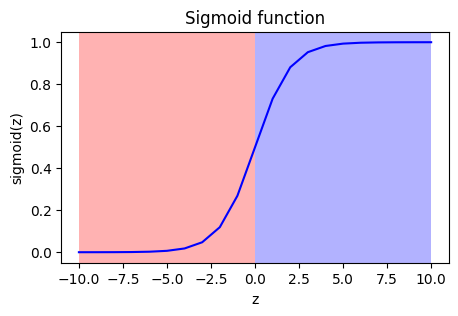

In [111]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp,y,c='b')
ax.axvspan(-10,0,0,1,facecolor='red',alpha=0.3,label='z < 0')
ax.axvspan(0,10,0,1,facecolor='blue',alpha=0.3,label='z > 0')

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')


Decision Boundary 

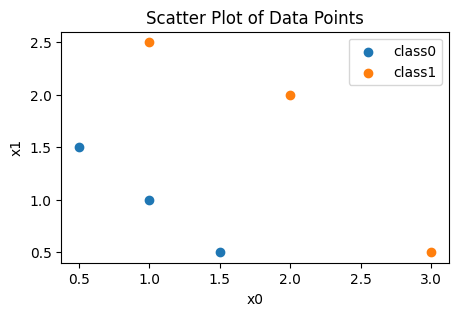

In [112]:
x = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 
fig,ax = plt.subplots(1,1,figsize=(5,3))
for  i in range(2):
    ax.scatter(x[y.flatten()==i,0],x[y.flatten()==i,1],label=f'class{i}')
ax.set_title('Scatter Plot of Data Points')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.legend()
plt.show()

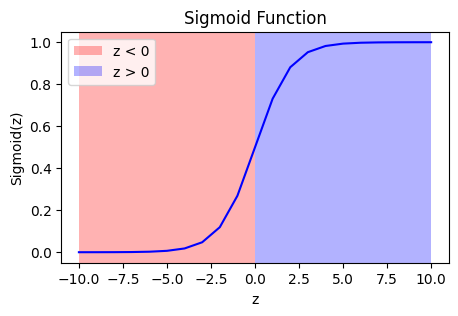

In [113]:
z_tmp = np.arange(-10,11)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp,sigmoid(z_tmp),c='b')
ax.axvspan(-10,0,facecolor='r',alpha=0.3,label='z < 0')
ax.axvspan(0,10,facecolor='b',alpha=0.3,label='z > 0')
ax.set_title('Sigmoid Function')
ax.set_xlabel('z')
ax.set_ylabel('Sigmoid(z)')
ax.legend()

Plotting the decision boundary

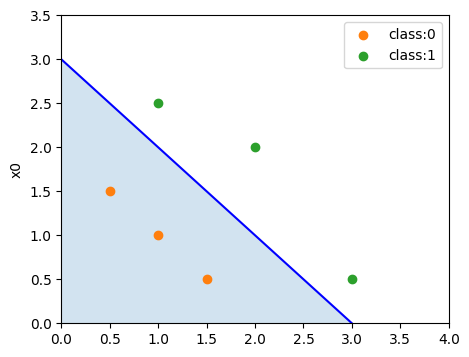

In [114]:
x0 = np.arange(0,6)
x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x0,x1,c='b')
ax.axis([0,4,0,3.5])
ax.fill_between(x0,x1,alpha=0.2)
for i in range(2):
    ax.scatter(x[y.flatten()==i,0],x[y.flatten()==i,1],label=f'class:{i}')
ax.set_ylabel('x1')
ax.set_ylabel('x0')
ax.legend()
plt.show()

Cost Function

In [115]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

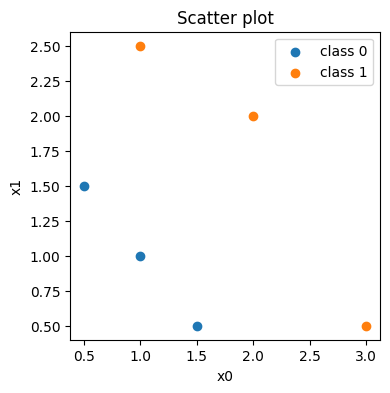

In [116]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
for i in range(2):
    ax.scatter(x_train[y_train==i,0],x_train[y_train==i,1],label=f'class {i}')
ax.set_title('Scatter plot')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.legend()
plt.show()

Cost Function

In [117]:
def compute_cost_logistic(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost/m
    return cost

In [118]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(x_train,y_train,w_tmp,b_tmp))

0.36686678640551745


Plotting the decision boundary

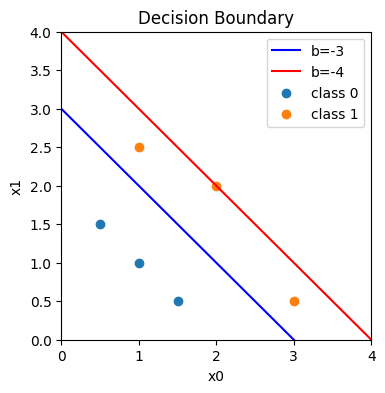

In [119]:
x0 = np.arange(0,6)
x1 = 3 - x0
x1_other = 4- x0
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x0,x1,c='blue',label='b=-3')
ax.plot(x0,x1_other,c='red',label='b=-4')
ax.axis([0,4,0,4])

for i in range(2):
    ax.scatter(x_train[y_train==i,0],x_train[y_train==i,1],label=f'class {i}')

ax.axis([0,4,0,4])
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plt.legend(loc='upper right')
plt.title('Decision Boundary')
plt.show()

In [120]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(x_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(x_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


Gradient Descent

In [121]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

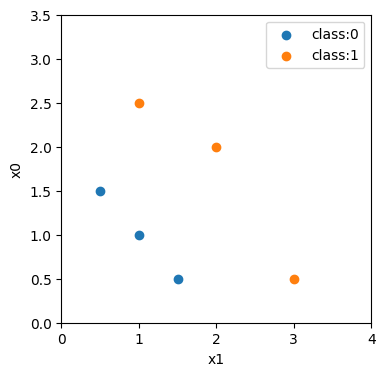

In [122]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
for i in range(2):
    ax.scatter(x_train[y_train == i,0],x_train[y_train == i,1],label=f'class:{i}')
ax.axis([0,4,0,3.5])
ax.set_ylabel('x0')
ax.set_xlabel('x1')
ax.legend()
plt.show()

In [123]:
def compute_gradient_logistic(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x_train[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db,dj_dw


In [124]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [127]:
def gradient_descent(x, y, w_in, b_in, alpha, iters):
    J_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(iters):
        dj_db, dj_dw = compute_gradient_logistic(x, y, w, b)
        w, b = w - alpha * dj_dw, b - alpha * dj_db
        if i % np.ceil(iters / 10) == 0:
            J_hist.append(compute_cost_logistic(x, y, w, b))
            print(f"Iteration {i:4d}: Cost {J_hist[-1]}")
    return w, b, J_hist


In [128]:
w_tmp,b_tmp,alpha,iters = np.zeros_like(x_train[0]),0.,0.1,10000
w_out,b_out,_ = gradient_descent(x_train,y_train,w_tmp,b_tmp,alpha,iters)
print(f"\n Updated paramters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870456
Iteration 2000: Cost 0.08460064176930081
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.042907594216820076
Iteration 5000: Cost 0.034338477298845684
Iteration 6000: Cost 0.028603798022120097
Iteration 7000: Cost 0.024501569608793
Iteration 8000: Cost 0.02142370332569295
Iteration 9000: Cost 0.019030137124109114

 Updated paramters: w:[5.281 5.078], b:-14.222409982019837
